# Data analysis

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# Read data
DIR = '/nfs/spare11/env315/data/'
datafile = DIR+'era5_u1060_daily_1980-2019.nc'
data = xr.open_mfdataset(datafile).compute()
data

<xarray.Dataset> Size: 175kB
Dimensions:              (time: 14610)
Coordinates:
    lat                  float64 8B 60.0
    plev                 float64 8B 1e+03
  * time                 (time) datetime64[ns] 117kB 1980-01-01T09:00:00 ... ...
Data variables:
    u_component_of_wind  (time) float32 58kB 33.96 37.4 38.93 ... 40.91 41.23

In [4]:
# extract the variable
data = data.u_component_of_wind
data

<xarray.DataArray 'u_component_of_wind' (time: 14610)> Size: 58kB
array([33.964096, 37.398537, 38.92926 , ..., 41.941204, 40.91121 ,
       41.22743 ], dtype=float32)
Coordinates:
    lat      float64 8B 60.0
    plev     float64 8B 1e+03
  * time     (time) datetime64[ns] 117kB 1980-01-01T09:00:00 ... 2019-12-31T0...

## Histogram
### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [5]:
# Extract data in specific month and specific year
u_winter = data.sel(time=data.time.dt.month.isin([1,2,3]))

# Select year of 1993, 1994, 1995
u_winter_1 = u_winter.sel(time=u_winter.time.dt.year.isin([1993,1994,1995]))

# Select year of 2008,2009,2010
u_winter_2 = u_winter.sel(time=u_winter.time.dt.year.isin([2008,2009,2010]))

## We use matplotlib.pyplot.hist (since we import matplotlib.pyplot as plt, we use plt.hist).
## Use of function: plt.hist(x, bins=None, density=False, weights=None), let's look at the input of the function one by one.
### x: input values, this takes either a single array or a sequence of arrays.
### bins: int or sequence or str,(default: 10). If bins is an integer, it defines the number of equal-width bins in the range. If bins is a sequence, it defines the bin edges, including the left edge of the first bin and the right edge of the last bin.
### density: bool value, default: False. If True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).
### weights: Array, default: None. An array of weights, of the same shape as input values x. Each value in x only contributes its associated weight towards the bin count.

## There are two ways to define bins
### Method 1: bins is an integer
### Method 2: bins is an array

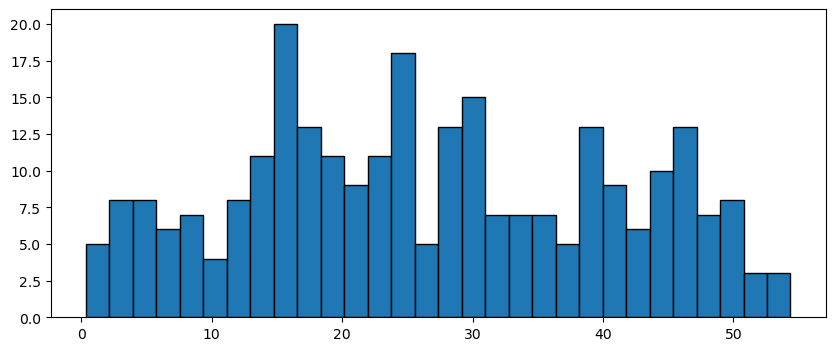

In [6]:
# Plot histogram of u_winter_1
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)
plt.hist(u_winter_1, bins=30, edgecolor="black")
plt.show()

## Output the data for histogram using
## n, bins, patches = plt.hist()
### n is the array or list of arrays with values (absolute or relative frequency) of the histogram bins.
### bins is array showing the edges of the bins, with its length of (n + 1)

[ 5.  8.  8.  6.  7.  4.  8. 11. 20. 13. 11.  9. 11. 18.  5. 13. 15.  7.
  7.  7.  5. 13.  9.  6. 10. 13.  7.  8.  3.  3.]
sum of absolute frequency of all bins:  270.0
number of samples/data points:  (270,)
[ 0.34920314  2.1503365   3.95146966  5.75260305  7.55373621  9.35486984
 11.156003   12.95713615 14.75826931 16.55940247 18.36053658 20.16166878
 21.96280289 23.76393509 25.5650692  27.3662014  29.16733551 30.96846962
 32.76960373 34.57073593 36.37187195 38.17300415 39.97413635 41.77526855
 43.57640457 45.37753677 47.17866898 48.97980499 50.78093719 52.5820694
 54.3832016 ]


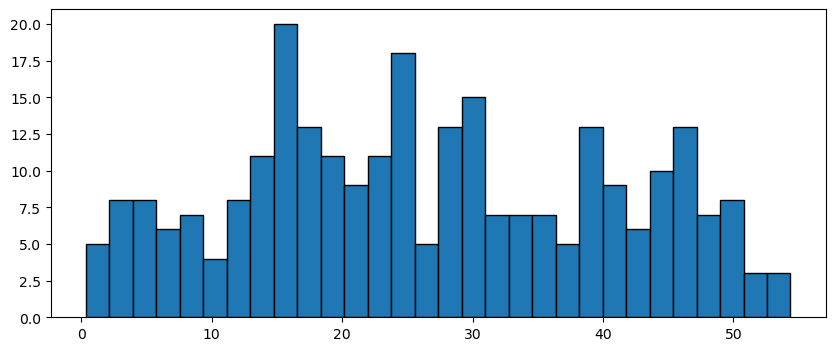

In [26]:
# Try to output the data for the histogram
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)
n, bins, patches = plt.hist(u_winter_1, bins=30, edgecolor="black")
print(n)
print('sum of absolute frequency of all bins: ',np.sum(n))
print('number of samples/data points: ',u_winter_1.shape)
print(bins)
# You can compute the interval of the bins array, and you will find the interval is 1.8011333644390106

# Exercise

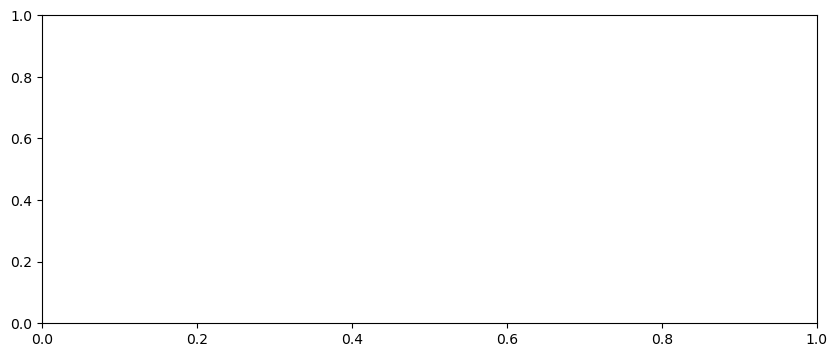

In [8]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)

# Use 20 bins, how would you change the code above?


# Print the number of samples in each bin and the edges of bins
# What is the bin interval?


(14,) [ 0.  0. 20. 16. 25. 38. 35. 31. 24. 22. 23. 26. 10.  0.]
sum of absolute frequency of all bins:  270.0
number of samples/data points:  (270,)
(15,) [-10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.
  60.]


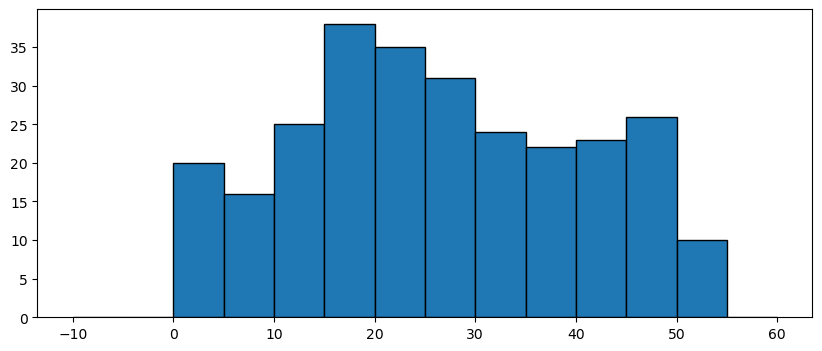

In [13]:
# Define our own bins interval
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)
n, bins, patches = plt.hist(u_winter_1,bins=np.arange(-10, 65, 5), edgecolor="black")
print(n.shape,n)
print('sum of absolute frequency of all bins: ',np.sum(n))
print('number of samples/data points: ',u_winter_1.shape)
print(bins.shape,bins)

# Excercise

In [ ]:
# Define our own bins interval as 2, the bins start from -10 and end with 60. 
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)
n, bins, patches = plt.hist(u_winter_1,bins=np.arange(), edgecolor="black")
print(n.shape,n)
print('sum of absolute frequency of all bins: ',np.sum(n))
print('number of samples/data points: ',u_winter_1.shape)
print(bins.shape,bins)

## The above code is using the absolute frequency, now we try to use relative frequency.
### Method 1: using density
### If density='True', draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).

(14,) [0.         0.         0.01481481 0.01185185 0.01851852 0.02814815
 0.02592593 0.02296296 0.01777778 0.0162963  0.01703704 0.01925926
 0.00740741 0.        ]
sum of relative frequency of all bins:  1.0
(15,) [-10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.
  60.]


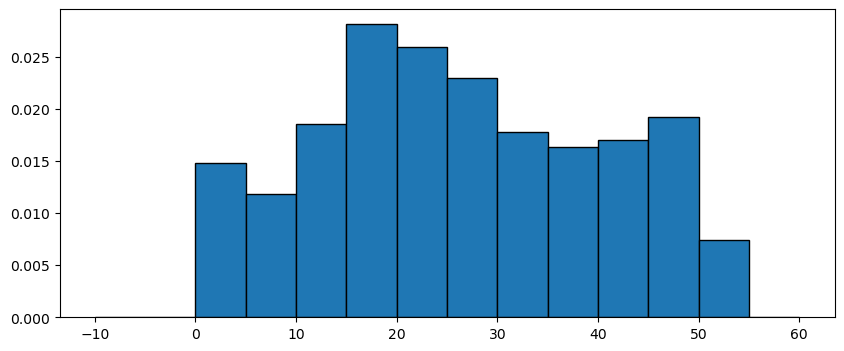

In [15]:
# Setting density as True
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)
n, bins, patches = plt.hist(u_winter_1,bins=np.arange(-10, 65, 5), density='True', edgecolor="black")
print(n.shape,n)
print('sum of relative frequency of all bins: ',np.sum(n)*5)
print(bins.shape,bins)

### Method 2: using weights
### weights is an array of weights, of the same shape as the data. Each value in x only contributes its associated weight towards the bin count. 
### In order to compute the relative frequency, which is the number of each bin divided by the sample size, the weights should be an array of 1/n, where n is the sample size. 

(14,) [0.         0.         0.07407407 0.05925928 0.09259246 0.14074101
 0.12962997 0.11481509 0.08888912 0.0814817  0.08518541 0.09629655
 0.03703713 0.        ]
sum of relative frequency of all bins:  1.0
(15,) [-10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.
  60.]


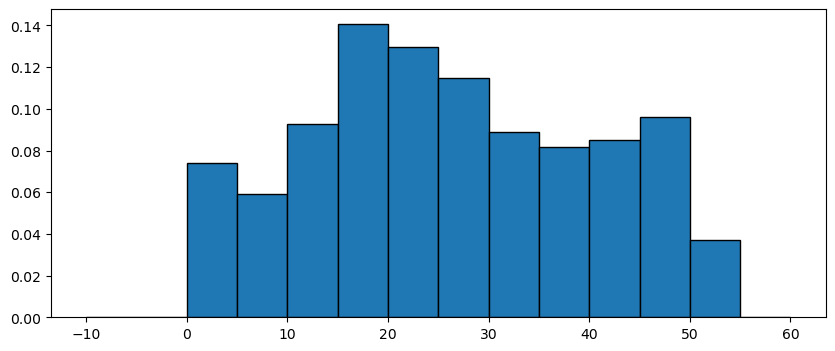

In [54]:
# Plotting relative frequency = (number of each bin)/(sample size)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)

# Defining weights
weights = np.ones_like(u_winter_1.values) / float(len(u_winter_1.values))

# Plotting histogram with y-axis being relative frequency
n, bins, patches = plt.hist(u_winter_1,bins=np.arange(-10, 65, 5), weights=weights, edgecolor="black")
print(n.shape,n)
print('sum of relative frequency of all bins: ',np.sum(n,dtype=np.float16))
print(bins.shape,bins)

### Now we take a look at different visualizations, such as defining colors, the transparency of histogram, bins edge colors, etc. 

Text(0.5, 0, 'U1060 [m/s]')

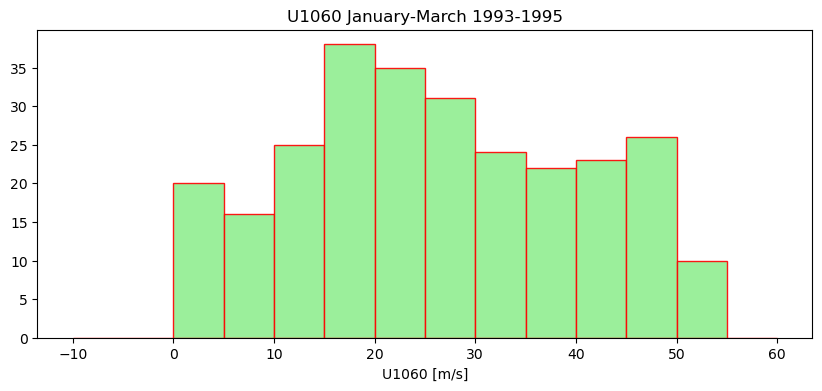

In [39]:
# Different visualization styles
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)
n, bins, patches = plt.hist(u_winter_1, bins=np.arange(-10, 65, 5), edgecolor="red", color="lightgreen", alpha = 0.9)
# add figure title and x-axis label to the histogram
plt.title('U1060 January-March 1993-1995')
ax.set_xlabel('U1060 [m/s]')

## Usually, adding the lines of the mean or median, 5th, 25th, 75th, 95th etc. percentiles would help us to analyze the data distribution better, especially when we are comparing two or more different histograms. 

In [40]:
# Compute mean, 5th, and 95th percentiles of u_winter_1
u1_mean = np.mean(u_winter_1)
u1_5per = np.percentile(u_winter_1, 5)
u1_95per = np.percentile(u_winter_1, 95)

Text(0.5, 0, 'U1060 [m/s]')

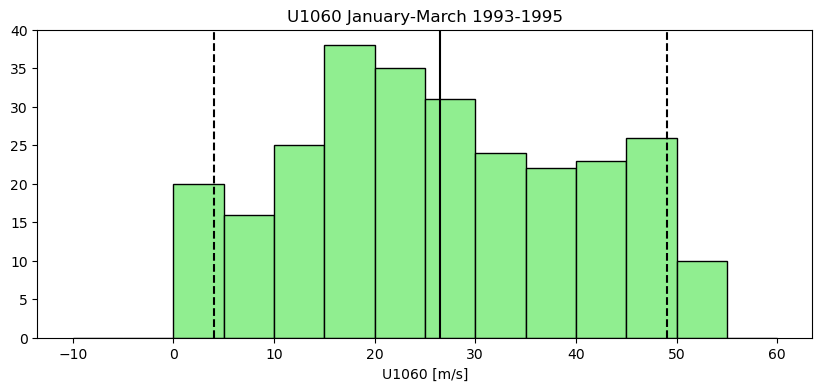

In [49]:
# Add the lines of mean, 5th, and 95th percentiles of u_winter_1 to the histogram
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)
n, bins, patches = plt.hist(u_winter_1, bins=np.arange(-10, 65, 5), edgecolor="black", color="lightgreen")

plt.vlines(u1_mean, 0, 40, colors='k')
plt.vlines(u1_5per, 0, 40, colors='k', linestyle='dashed')
plt.vlines(u1_95per, 0, 40, colors='k', linestyle='dashed')
plt.ylim([0, 40])

# add figure title and x-axis label to the histogram
plt.title('U1060 January-March 1993-1995')
ax.set_xlabel('U1060 [m/s]')

# Exercise

### Plot the histogram of u_winter_2 computed above.
### You can choose your own number of bins or bins interval, print the values of each bin and the edges of bins. 
### You can choose to use either absolute frequency or relative frequency for the histogram
### Add lines of mean, 25th, and 75th percentiles of u_winter_2 on top of the histogram